# Trabajo Práctico Especial

## Programación Orientada a Objetos


### Integrantes:
    Coria, Santiago
    santiagocoria@live.com
    
    Santos, Matías Andrés
    matias_a_santos@hotmail.com
    
### Ayudante:
    Rodriguez, Guillermo
    
### Sistema de Archivos

#### Un Sistema de Archivos debe organizar y manipular los siguientes elementos:
    *Archivos
    *Directorios
    *Links
    *Archivos comprimidos

   Los archivos se definen por un nombre, una fecha de creación, una fecha de última
modificación y un tamaño.
   Los directorios tienen un nombre, una fecha de creación y además contienen un conjunto
de archivos y un conjunto de sub-directorios. El tamaño de un directorio está dado por el
tamaño de sus sub-directorios, sus archivos, sus links y sus archivos comprimidos.
   Los links son vínculos a otro archivo o directorio y tienen un nombre, una fecha de
creación y su tamaño en disco es siempre igual a 1Kb.
   Los archivos comprimidos son un tipo particular de archivo que contienen otros archivos
y/o directorios en formato comprimido según una tasa de compresión dada, tienen un nombre y una fecha de creación.

#### Implementar una solución orientada a objetos para este problema que permita determinar:
   *La cantidad de elementos que posee un directorio particular
   *El tamaño total de un directorio particular
   *Soporte de búsqueda de elementos que satisfacen un determinado criterio. Los criterios incluyen la búsqueda por criterios básicos, por ejemplo:
       -buscar los archivos de nombre 'objetos.ppt'
       -buscar los archivos creados el '25/6/2001'.
       -Así como también búsqueda por criterios más complejos que resultan de combinar
        estos criterios con operaciones lógicas(and, or, not), por ejemplo:
       -buscar los archivos de nombre 'objetos.ppt' o de nombre 'programacion.ppt'
       -buscar los archivos de (nombre 'objetos.ppt' y de creador, 'Juan' ) o los
        archivos con fecha '25/2/1990'.
       -En el caso de los archivos Comprimidos, si algún elemento en su interior cumple el
        criterio de búsqueda, el archivo comprimido cumple entonces con el criterio de búsqueda.
   *Mecanismos para realizar listados completos de los elementos dentro del sistema. La lista
    resultante debe contener los nombre de los archivos, con el path completo desde la raíz. En
    caso de los directorio, se lista primero el nombre del directorio y luego se lista todo su contenido.
    Por ejemplo: 
   a.exe
   b.exe
   dir1\
   dir1\hh.exe
   dir1\dir2\
   dir1\dir2\mm.zip
   dir1\jj.doc


In [1]:
%%python
! pip install iplantuml
import  iplantuml

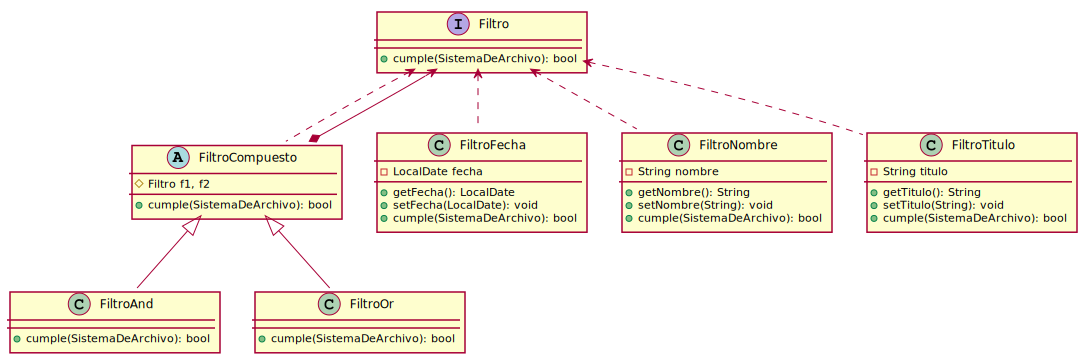

In [2]:
%%python
%%plantuml 

@startuml

interface Filtro
Filtro : {abstract} + cumple(SistemaDeArchivo): bool

abstract FiltroCompuesto
Filtro <.. FiltroCompuesto
Filtro <--* FiltroCompuesto

FiltroCompuesto : # Filtro f1, f2
FiltroCompuesto : + {abstract} cumple(SistemaDeArchivo): bool

FiltroCompuesto ^-- FiltroAnd

FiltroAnd : + cumple(SistemaDeArchivo): bool

FiltroCompuesto ^-- FiltroOr

FiltroOr : + cumple(SistemaDeArchivo): bool

Filtro <.. FiltroFecha

FiltroFecha : - LocalDate fecha
FiltroFecha : + getFecha(): LocalDate
FiltroFecha : + setFecha(LocalDate): void
FiltroFecha : + cumple(SistemaDeArchivo): bool

Filtro <.. FiltroNombre

FiltroNombre : - String nombre
FiltroNombre : + getNombre(): String
FiltroNombre : + setNombre(String): void
FiltroNombre : + cumple(SistemaDeArchivo): bool

Filtro <.. FiltroTitulo

FiltroTitulo : - String titulo
FiltroTitulo : + getTitulo(): String
FiltroTitulo : + setTitulo(String): void
FiltroTitulo : + cumple(SistemaDeArchivo): bool

@enduml

In [3]:
public interface Filtro {
	public abstract boolean cumple(SistemaDeArchivo s);
}

ERROR:  java.lang.IllegalStateException

#### Definimos a filtro como una interfaz la cual tendrá una función cumple que retornará un valor booleano, el cual dependerá de las clases que implementen filtro.

In [4]:
public abstract class FiltroCompuesto implements Filtro {

	protected Filtro f1,f2;
	
	public FiltroCompuesto(Filtro f1, Filtro f2) {
		this.f1 = f1;
		this.f2 = f2;
	}
}

ERROR:  java.lang.IllegalStateException

#### Filtro compuesto es una clase abstracta que implementa la interfaz Filtro. La misma está conformada por 2 filtros, haciendo uso del patrón de diseño composite, donde podemos utilizar variables del tipo de nuestro padre y así aprovecharnos del polimorfismo y el binding dinámico.

In [5]:
public class FiltroAnd extends FiltroCompuesto{

	public FiltroAnd(Filtro f1, Filtro f2) {
		super(f1,f2);
	}
	public boolean cumple(SistemaDeArchivo s) {
		return ((f1.cumple(s)) && (f2.cumple(s)));
	}
}

ERROR:  java.lang.IllegalStateException

In [6]:
public class FiltroOr extends FiltroCompuesto {

	public FiltroOr(Filtro f1, Filtro f2) {
		super(f1,f2);
	}
	public boolean cumple(SistemaDeArchivo s) {
		return ((f1.cumple(s)) || (f2.cumple(s)));
	}
}

ERROR:  java.lang.IllegalStateException

#### Con la clase FiltroCompuesto podremos realizar filtros del tipo and y or, los cuales implementaran a su gusto el metodo abstracto heredado "cumple", haciendo uso del binding dinámico.

In [7]:
import java.time.LocalDate;
public class FiltroFecha {

	private LocalDate fecha;
	
	public FiltroFecha(LocalDate fecha) {
		this.fecha = fecha;
	}
	public LocalDate getFecha() {
		return fecha;
	}
	public void setFecha(LocalDate fecha) {
		this.fecha = fecha;
	}
	public boolean cumple(SistemaDeArchivo s) {
		return (this.getFecha() == (s.getFecha()));
	}
}

ERROR:  java.lang.IllegalStateException

In [8]:
public class FiltroNombre implements Filtro {

	private String nombre;
	
	FiltroNombre(String nombre) {
		this.nombre=nombre;
	}
	public String getNombre() {
		return nombre;
	}
	public void setNombre(String nombre) {
		this.nombre = nombre;
	}
	public boolean cumple(SistemaDeArchivo s) {
		return (this.getNombre().equals(s.getNombre()));
	}
}

ERROR:  java.lang.IllegalStateException

In [9]:
public class FiltroTamanio implements Filtro{
	
	private double tamanio;
	
	public FiltroTamanio(double tamanio) {
		this.tamanio = tamanio;
	}
	public double getTamanio() {
		return tamanio;
	}
	public void setTamanio(double tamanio) {
		this.tamanio = tamanio;
	}
	public boolean cumple(SistemaDeArchivo s) {
		return (this.getTamanio() == (s.getTamanio()));
	}
}

ERROR:  java.lang.IllegalStateException

#### Estos filtros (Fecha, Nombre, Tamanio), comparan el valor privado que contienen, con un parámetro específico de un Object, que es casteado a SistemaDeArchivo para luego llamar a el getter deseado.

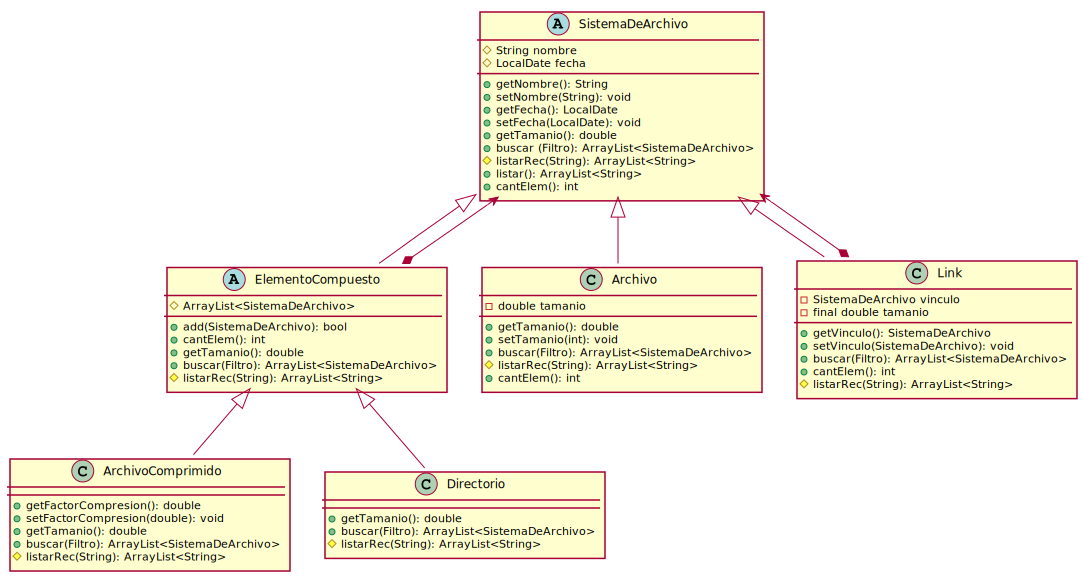

In [14]:
%%python
%%plantuml 

@startuml

abstract SistemaDeArchivo
SistemaDeArchivo : # String nombre
SistemaDeArchivo : # LocalDate fecha
SistemaDeArchivo : + getNombre(): String
SistemaDeArchivo : + setNombre(String): void
SistemaDeArchivo : + getFecha(): LocalDate
SistemaDeArchivo : + setFecha(LocalDate): void
SistemaDeArchivo : + {abstract} getTamanio(): double
SistemaDeArchivo : + {abstract} buscar (Filtro): ArrayList<SistemaDeArchivo>
SistemaDeArchivo : # {abstract} listarRec(String): ArrayList<String>
SistemaDeArchivo : + listar(): ArrayList<String>
SistemaDeArchivo : + {abstract} cantElem(): int

abstract ElementoCompuesto
SistemaDeArchivo ^-- ElementoCompuesto
SistemaDeArchivo <--* ElementoCompuesto

ElementoCompuesto : # ArrayList<SistemaDeArchivo>
ElementoCompuesto : + add(SistemaDeArchivo): bool
ElementoCompuesto : + cantElem(): int
ElementoCompuesto : + {abstract} getTamanio(): double
ElementoCompuesto : + {abstract} buscar(Filtro): ArrayList<SistemaDeArchivo>
ElementoCompuesto : # {abstract} listarRec(String): ArrayList<String>
    
ElementoCompuesto ^-- ArchivoComprimido

ArchivoComprimido : + getFactorCompresion(): double
ArchivoComprimido : + setFactorCompresion(double): void
ArchivoComprimido : + getTamanio(): double
ArchivoComprimido : + {abstract} buscar(Filtro): ArrayList<SistemaDeArchivo>
ArchivoComprimido : # listarRec(String): ArrayList<String>

ElementoCompuesto ^-- Directorio

Directorio : + getTamanio(): double
Directorio : + buscar(Filtro): ArrayList<SistemaDeArchivo>
Directorio : # listarRec(String): ArrayList<String>

SistemaDeArchivo ^-- Archivo

Archivo : - double tamanio
Archivo : + getTamanio(): double
Archivo : + setTamanio(int): void
Archivo : + buscar(Filtro): ArrayList<SistemaDeArchivo>
Archivo : # listarRec(String): ArrayList<String>
Archivo : + cantElem(): int

SistemaDeArchivo ^-- Link
SistemaDeArchivo <--* Link

Link : - SistemaDeArchivo vinculo
Link : - final double tamanio
Link : + getVinculo(): SistemaDeArchivo
Link : + setVinculo(SistemaDeArchivo): void
Link : + buscar(Filtro): ArrayList<SistemaDeArchivo>
Link : + cantElem(): int
Link : # listarRec(String): ArrayList<String>

@enduml

#### Esta clase será nuestra clase padre como se muestra en el diagrama, la misma será una clase abstracta ya que obliga a sus clases hijas a implementar los metodos abstractos especificados en el diagrama

In [ ]:
import java.util.ArrayList;
import java.time.LocalDate;

public abstract class SistemaDeArchivo {
	
	protected String nombre;
	protected LocalDate fecha;
	
	SistemaDeArchivo(String nombre, LocalDate fecha) {
		this.nombre=nombre;
		this.fecha=fecha;
	}
	public String getNombre() {
		return nombre;
	}
	public void setNombre(String nombre) {
		this.nombre = nombre;
	}
	public LocalDate getFecha() {
		return fecha;
	}
	public void setFecha(LocalDate fecha) {
		this.fecha = fecha;
	}
	public abstract double getTamanio();
	public abstract ArrayList<SistemaDeArchivo> buscar (Filtro f);
	protected abstract ArrayList<String> listarRec (String s);
	public ArrayList<String> listar () {
		ArrayList<String> aux = listarRec("");
		return aux;
	}
	public abstract int cantElem();
}

#### Esta clase extiende de sistema de archivo y ademas sera una clase abstracta ya que sabrá hacer algunas funciones como buscar y saber cuantos elementos tiene un directorio o un archivo comprimido, pero los demás métodos los hará sus clases hijas (directorio y archivo comprimido).

#### Implementación de buscar:
   Se le pasará un filtro como parámetro y se meterá en profundidad en nuestra estructura y cuando llegue al último elemento por binding dinámico llamara al buscar del archivo o link y estos se encargaran de agregarlos a un arraylist en caso de que cumpla con la condición luego retorna dicho arreglo y nosotros lo iremos agregando a nuestro arraylist auxiliar el cual será retornado al terminar de recorrer nuestra estructura.
 
#### Implementación de cantElem:
   Con un for each se recorre nuestra estructura y por recursión se meterá en profundidad hasta que al llegar a un archivo o link llamara a su respectivo cantElem que nos retornará un uno, luego en un variable auxiliar los iremos sumando y así calcularemos cuantos archivos y link tiene nuestro directorio o archivo comprimido.


In [ ]:
import java.util.ArrayList;
import java.time.LocalDate;

public abstract class ElementoCompuesto extends SistemaDeArchivo {
	
	protected ArrayList<SistemaDeArchivo> carpeta= new ArrayList<SistemaDeArchivo>();
	
	public ElementoCompuesto(String nombre, LocalDate fecha) {
		super(nombre,fecha);
	}
	public boolean add(SistemaDeArchivo s) {
		if (!carpeta.contains(s))
		{
			carpeta.add(s);
			return true;
		}
		return false;
	}
	public int cantElem(){
		int aux=0;
		for(SistemaDeArchivo a: carpeta)
			aux+= a.cantElem();
		return aux;
	}
	public abstract double getTamanio();
}

#### Esta es una clase hija que extiende de elemento compuesto y por ende deberá de implementar las funciones abstractas de su clase padre.

#### Implementación de getTamanio:
   Este procedimiento se encarga de obtener el peso total de los archivos que se encuentren en el directorio. Para llevar a cabo esto se va a recorrer la estructura en profundidad y cuando llegue a un archivo o link este nos retornara su peso y lo iremos sumando a nuestro peso total.
	
#### Implementación de listar:
   Este creara un Arraylist que almacenará strings y llamara a un listar recursivo al cual se le pasa un string por parámetro.
	
#### Implementación de listarRec:
   Este es un método protected de nuestra clase ya que el usuario no podrá acceder a esta función si no que nuestro procedimiento listar lo usará.
Este lo que hará es meterse en profundidad e ir concatenando los nombres de los objetos por los que pase, y cuando llegue a un archivo, link o archivo comprimido cortará agregando todo el camino a un ArrayList de Strings. Con esto lo que haremos es formar una ruta como la que nos aparece cuando buscamos un archivo en nuestra PC.


In [ ]:
import java.util.ArrayList;
import java.time.LocalDate;

public class Directorio extends ElementoCompuesto{

	public Directorio(String nombre, LocalDate fecha) {
		super(nombre,fecha);
	}
	public double getTamanio() {
		double aux=0;
		for(SistemaDeArchivo a: carpeta)
			aux+= a.getTamanio();
		return aux;
	}
	public ArrayList<SistemaDeArchivo> buscar (Filtro f) {
		ArrayList<SistemaDeArchivo> aux=new ArrayList<SistemaDeArchivo>();
		for(SistemaDeArchivo c: carpeta)
			aux.addAll(c.buscar(f));
		return aux;
	}
	protected ArrayList<String> listarRec (String s) {
		ArrayList<String> aux = new ArrayList<String>();
		aux.add(s + this.getNombre());
		for (SistemaDeArchivo sis : carpeta)
			aux.addAll(sis.listarRec(s + this.getNombre() + "\\"));
		return aux;
	}
}

#### Nuevamente, esta también es una clase que extiende de Elemento compuesto, ya que cada archivo comprimido puede contener ya sea directorios, links, archivos o archivos comprimidos. En la inicialización del mismo, a diferencia del directorio, se le pasa por parámetro un valor double que indica qué tan comprimido estará éste.

#### Implementación de getFactorCompresion:
   Esta función retornará el valor double asignado a qué tan comprimido está el archivo.
	
#### Implementación de setFactorCompresion:
   Esta función permitirá al usuario cambiar el porcentaje de compresión del archivo comprimido de donde se lo llame.
	
#### Implementación de getTamanio:
   Este procedimiento se encarga de obtener el peso total de los archivos que se encuentren en el archivo comprimido. Para llevar a cabo esto se va a recorrer la estructura en profundidad y cuando llegue a un archivo o link este nos retornara su peso y lo iremos sumando a nuestro peso total, luego de obtener el peso antes de retornarlo lo dividiremos por nuestro factor de compresión.
	
#### Implementación de listarRec:
   Este procedimiento lo que hace es retornar el nombre del archivo comprimido.
    
#### Implementación de listar: 
   Llamará a listarRec, y retornará el ArrayList creado por la función.

In [ ]:
import java.util.*;
import java.time.LocalDate;

public class ArchivoComprimido extends ElementoCompuesto{
	
	private double factorCompresion;
	
	public ArchivoComprimido(String nombre, LocalDate fecha,double factorCompresion) {
		super(nombre,fecha);
		this.factorCompresion=factorCompresion;
	}
	public double getFactorCompresion() {
		return factorCompresion;
	}
	public void setFactorCompresion(double factorCompresion) {
		this.factorCompresion = factorCompresion;
	}
	public double getTamanio() {
		double aux=0;
		for(SistemaDeArchivo a: carpeta)
			aux+= a.getTamanio();
		return aux*this.getFactorCompresion();
	}
	public ArrayList<SistemaDeArchivo> buscar(Filtro f) {
		ArrayList<SistemaDeArchivo> aux = new ArrayList<SistemaDeArchivo>();
		Iterator<SistemaDeArchivo> itr = carpeta.iterator();
		boolean encontrado = false;
		while (itr.hasNext() && (!encontrado))
		{
			SistemaDeArchivo s = itr.next();
			encontrado = f.cumple(s);
		}
		if (encontrado)
			aux.add(this);
		return aux;
	}
	protected ArrayList<String> listarRec (String s) {
		ArrayList<String> aux = new ArrayList<String>();
		aux.add(s + this.getNombre());
		return aux;
	}
}

#### Esta clase también extiende de SistemaDeArchivo, implementando a su vez, todos los métodos especificados anteriormente. La diferencia entre esta clase y Link, es que ésta tiene los valores concretos guardados en sí misma, mientras que Link hace referencia a otro objeto. También cabe destacar que los archivos podrán variar su tamanio, a diferencia de Link, que tiene un tamanio específico constante.


In [ ]:
import java.util.ArrayList;
import java.time.LocalDate;

public class Archivo extends SistemaDeArchivo {

	private double tamanio;
	
	Archivo(String nombre, LocalDate fecha, double tamanio) {
		super(nombre,fecha);
		this.tamanio=tamanio;
	}
	public double getTamanio() {
		return tamanio;
	}
	public void setTamanio(int tamanio) {
		this.tamanio = tamanio;
	}
	public ArrayList<SistemaDeArchivo> buscar (Filtro f) {
		ArrayList<SistemaDeArchivo> aux = new ArrayList<SistemaDeArchivo>();
		if(f.cumple(this))
			aux.add(this);
		return aux;
	}
	public int cantElem() {
		return 1;
	}
	protected ArrayList<String> listarRec (String s) {
		ArrayList<String> aux = new ArrayList<String>();
		aux.add(s + this.getNombre());
		return aux;
	}
}

#### Esta es una clase que extiende de SistemaDeArchivo, por ende implementará los métodos abstractos de la misma. A su  vez, constará de dos variable privadas además de las que ya tiene la clase padre. Esta subclase tendrá un comportamiento particular, ya que todas sus funciones, excepto getTamanio, serán llamadas a partir de su variable privada vínculo.

In [ ]:
import java.util.ArrayList;
import java.time.LocalDate;

public class Link extends SistemaDeArchivo {

	private SistemaDeArchivo vinculo;
	private final double tamanio = 1;
	
	Link(String nombre, LocalDate fecha, SistemaDeArchivo vinculo) {
		super(nombre,fecha);
		this.vinculo=vinculo;
	}
	public SistemaDeArchivo getVinculo() {
		return vinculo;
	}
	public void setVinculo(SistemaDeArchivo vinculo) {
		this.vinculo = vinculo;
	}
	public ArrayList<SistemaDeArchivo> buscar (Filtro f) {
		return this.getVinculo().buscar(f);
	}
	public double getTamanio() {
		return tamanio;
	}
	public int cantElem() {
		return 1;
	}
	protected ArrayList<String> listarRec (String s) {
		return this.getVinculo().listarRec(s);
	}
}

#### A continuación, se crearán los directorios, archivos, y archivos comprimidos respectivamente, necesarios para realizar el ejemplo que se encuentra en el enunciado del ejercicio. 

In [ ]:
import java.time.LocalDate;

public class Main {

	public static void main(String[] args) {

		SistemaDeArchivo a= new Archivo("a.exe",LocalDate.now(), 2.13);
		SistemaDeArchivo b= new Archivo("b.exe",LocalDate.now(), 2.13);
		SistemaDeArchivo hh= new Archivo("hh.exe",LocalDate.now(), 2.13);
		SistemaDeArchivo mm= new ArchivoComprimido("mm.zip",LocalDate.now(), 2.13);
		SistemaDeArchivo jj= new Archivo("jj.doc",LocalDate.now(), 2.13);

		ElementoCompuesto dir1 = new Directorio("dir1",LocalDate.now());
		ElementoCompuesto dir2= new Directorio("dir2",LocalDate.now());
		ElementoCompuesto carpetaAux= new Directorio("carpetaAux",LocalDate.now());
		
		dir2.add(mm);
		dir1.add(hh);
		dir1.add(dir2);
		dir1.add(jj);
		carpetaAux.add(a);
		carpetaAux.add(b);
		carpetaAux.add(dir1);
		for (String s : carpetaAux.listar())
			System.out.println(s + "\n");
	}
}